In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_regression

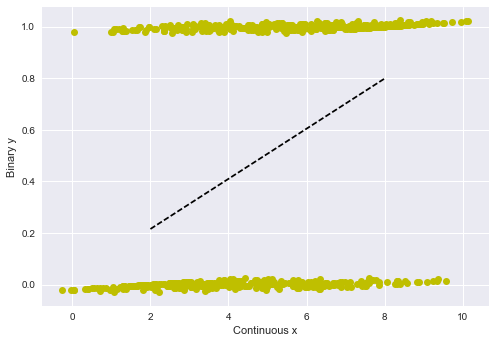

In [2]:
# Set the random seed so that the 'random' data is the same each time the code is run.
np.random.seed(seed=456613)

# Create some data.
df = pd.DataFrame()

for probs in list(range(2, 9)):
    # yields: 2,3,4,5,6,7,8
    
    tmp = pd.DataFrame({
        'y': np.random.binomial(1, probs / 10, size=(1, 100))[0],
        # 1 means we get a binomial (1 or 0)
        # probs / 10 means we are less likely to get 1 early on (2/10 v.s. 8/10)
        # size can be written as "size=100"
        # [0] is because this is a 2D array (if we'd use `size=100` we wouldn't need to do that)
        'x': probs
    }) 
    df = df.append(tmp)

# Continuous predictor.
# x can be: 2,3,4,5,6,7, or 8
x = df['x']

# Binary outcome.
# y is either 0 or 1
bin_y = df['y']

# Calculate linear regression for x and bin_y.
# Not totally sure what this does: https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
fit = np.polyfit(x,bin_y,1)

# Work as a function to return the predicted value of y.
# Not totally sure what this does: https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html
fit_fn = np.poly1d(fit)
# This creates the function that can use the least squares "fit" we did earlier.


# Add a little 'noise' to the data for graphing purposes.
# we're using 700 because there's 700 rows of data
jitter = np.random.randn(700)

# Display our results.
plt.plot(x + jitter, bin_y + jitter / 100, 'yo', x, fit_fn(x), '--k')
# I think "y" here is yellow and "o" is circles
# --k means: "- -" in black
plt.xlabel('Continuous x')
plt.ylabel('Binary y')
plt.show()

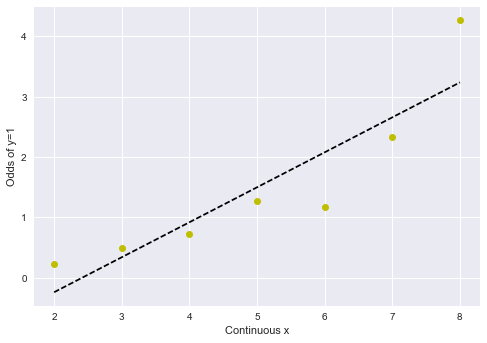

In [3]:
# Unique values in x.
xvals = x.unique()
# gives you [2,3,4,5,6,7,8]

# Calculate and store the odds.
# for each of the above integers
yodds = []
for xi in xvals: 
    y1_ct = bin_y[x == xi].sum()  # The number of trials y = 1.
    y0_ct = len(bin_y[x == xi]) - y1_ct  # The number of trials y = 0.
    yodds.append(y1_ct / y0_ct)  # Odds of getting y = 1 for xi.
    
# Calculate linear regression for x and yodds.
fit = np.polyfit(xvals, yodds, 1)

# Work as a function to return the predicted value of yodds.
fit_fn = np.poly1d(fit)

# Display our work.
plt.plot(xvals, yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Odds of y=1')
plt.show()

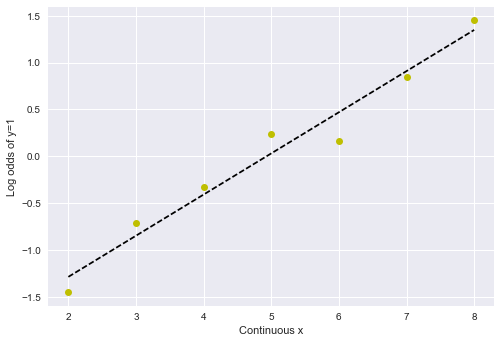

In [4]:
# Natural log of the odds.
ln_yodds = np.log(yodds)
# to reverse this we need to get the exponent
# np.exp(<number>)

# Calculate linear regression for x and yodds.
fit = np.polyfit(xvals, ln_yodds, 1)

# Works as a function to return the predicted value of yodds.
fit_fn = np.poly1d(fit)

# Display.
plt.plot(xvals, ln_yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Log odds of y=1')

plt.show()

In [5]:
# Formula: logit(HasHearingProblem)=−1+.02∗age+1∗male

# Write out a description of the effects that age and gender have on the odds of developing
# hearing problems in terms a layperson could understand.

# Include estimates for the odds of hearing problems in a 95 year old woman and a 50 year old man.
# Discuss your interpretation with your mentor.

# Description
# Males are much more likely to have hearing problem than females. Age similarly affects both genders.

# Calculation
# 95 year old woman: −1 + (0.02 * 95) + (1 * 0) = 0.9
# 50 year old man: -1 + (0.02 * 50) + (1 * 1) = 1

# We then need to exponentiate this, ex: np.exp( −1 + (.02 ∗ 50) + (1 ∗ 1) ).
# So for the Male one this would be equal to 2.718
# Question: How would we write this in plain English?

# If result >= 1:
#     has hearing problems
# else:
#     does NOT have hearing problems

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


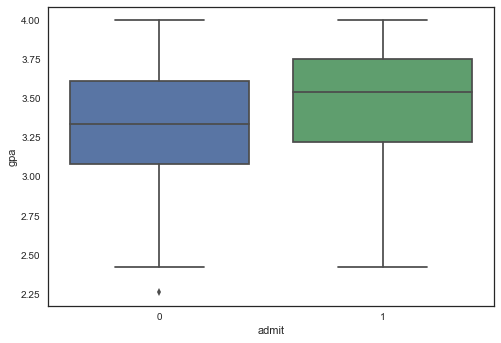

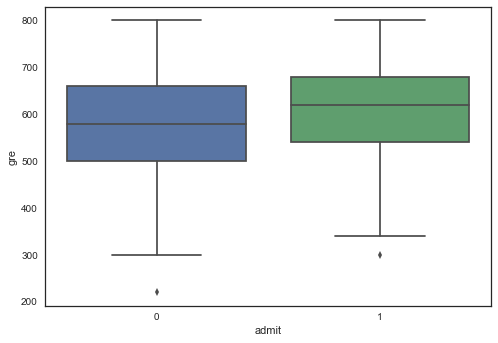

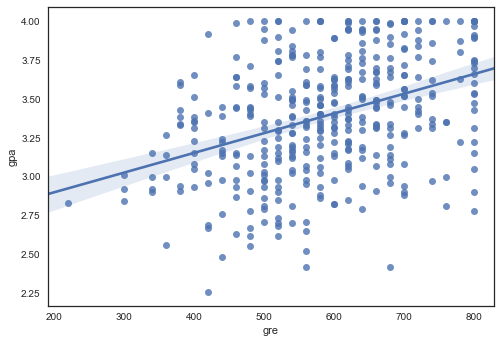

In [6]:
# Read in the data.
df = pd.read_csv("https://www.dropbox.com/s/qhf0ocdqb3gh7ni/logistic_regression.csv?dl=1") 

# Take a peek.
print(df.head())

# Prettier plots are better.
sns.set_style("white")

# Bivariate relationships of predictors to admissions outcome.
sns.boxplot(x="admit", y="gpa", data=df)
plt.show()
sns.boxplot(x="admit", y="gre", data=df)
plt.show()

# Relationship between predictors.
sns.regplot(x='gre', y='gpa', data=df)
plt.show()

In [7]:
# Declare predictors.
X_statsmod = df[['gre', 'gpa', 'rank']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(df['admit'], X_statsmod)
# Question: What does this do? ^^
# http://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.html
result = logit.fit()
# Question: Why do we need to fit? ^^

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

# Question: How to read the below summary?

Optimization terminated successfully.
         Current function value: 0.574302
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Wed, 20 Sep 2017   Pseudo R-squ.:                 0.08107
Time:                        18:53:02   Log-Likelihood:                -229.72
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 8.207e-09
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.101      0.036         0.000     0.004
gpa            0.7770      0.

In [8]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_statsmod)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(df['admit'], pred_y_statsmod, rownames=["admited"], colnames=["prediction"])

print('\n Accuracy by admission status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Accuracy by admission status
prediction    0   1
admited            
0           253  20
1            98  29

 Percentage accuracy
0.705


In [9]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e9)
y = df['admit']
X = df[['gpa', 'gre', 'rank']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y, rownames=["prediction"], colnames=["admited"]))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[ 0.77016637  0.00227425 -0.5587129 ]]
[-3.41656875]

 Accuracy by admission status
admited       0   1
prediction         
0           253  98
1            20  29

 Percentage accuracy
0.705


In [10]:
# Play around
# While the two packages yield similar accuracy rates, they have very different patterns of error.  Play with the models by adding additional features and shrinking the regularization coefficient to see if you can get the accuracy higher than 68%.  

In [19]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
print(myDF3)

   Coefficients  Standard Errors  t values  Probabilites
0       -0.1824            0.217    -0.841         0.401
1        0.1510            0.063     2.383         0.018
2        0.0004            0.000     2.106         0.036
3       -0.1095            0.024    -4.608         0.000


In [15]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html
f_regression(X, y)[1]

array([  3.41229812e-04,   2.08072334e-04,   9.17523648e-07])

In [14]:
# From earlier...
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Wed, 20 Sep 2017   Pseudo R-squ.:                 0.08107
Time:                        19:04:35   Log-Likelihood:                -229.72
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 8.207e-09
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.101      0.036         0.000     0.004
gpa            0.7770      0.327      2.373      0.018         0.135     1.419
rank          -0.5600      0.127     -4.405      0.0